In [ ]:
import pandas as pd
df = pd.read_csv("./Data/binarysystem.csv")
df.tail()

In [1]:

new_data = {
    'System': [],
    'SpT': [],
    'Pday': [],
    'Vmag': [],
    'BmV': [],
    'logM': [],
    'logMe': [],
    'logR': [],
    'logRe': [],
    'logg': [],
    'logge': [],
    'logT': [],
    'logTe': [],
    'logL': [],
    'logLe': []
}

# Iterate through the rows and create separate rows for each star
for index, row in df.iterrows():
    system_name = row['# System']
    for star_num in ['1', '2']:
        new_data['System'].append(f"{system_name}-{star_num}")
        new_data['SpT'].append(row[f'SpT{star_num}'])
        new_data['Pday'].append(row['Pday'])
        new_data['Vmag'].append(row['Vmag'])
        new_data['BmV'].append(row['BmV'])
        new_data['logM'].append(row[f'logM{star_num}'])
        new_data['logMe'].append(row[f'logM{star_num}e'])
        new_data['logR'].append(row[f'logR{star_num}'])
        new_data['logRe'].append(row[f'logR{star_num}e'])
        new_data['logg'].append(row[f'logg{star_num}'])
        new_data['logge'].append(row[f'logg{star_num}e'])
        new_data['logT'].append(row[f'logT{star_num}'])
        new_data['logTe'].append(row[f'logT{star_num}e'])
        new_data['logL'].append(row[f'logL{star_num}'])
        new_data['logLe'].append(row[f'logL{star_num}e'])

# Create the new DataFrame
new_df = pd.DataFrame(new_data)
new_df.to_csv("./Data/binarysystem-org.csv", index=False)
df1=pd.read_csv("./Data/binarysystem-org.csv")
# Print the resulting DataFrame
mask = (df1['BmV'] != -9.990) & (df1['logM'] != -9.990) & (df1['logT'] != -9.990) & (df1['logL'] != -9.990)
filtered_df = df1[mask]

filtered_df["Mass[solMass]"] = 10 ** filtered_df["logM"]
filtered_df["log.Teff [K]"] = filtered_df["logT"]
filtered_df["B-V"] = filtered_df["BmV"]
filtered_df['Absolute Mag'] = -2.5 * (df1['logL']) + 4.8
filtered_df['SpType'] = filtered_df['SpT'].str[0]
filtered_df.to_csv("./Data/FILTbinarysystem.csv", index=False)
filtered_df.tail()


NameError: name 'df' is not defined

In [ ]:

df1 = pd.read_csv('./Data/PiskunovPreprocessed.csv', usecols=['Mass[solMass]', 'log.Teff [K]', 'B-V', 'Absolute Mag'])

df2 = pd.read_csv('./Data/FILTbinarysystem.csv', usecols=['Mass[solMass]', 'log.Teff [K]', 'B-V', 'Absolute Mag'])

merged_df = pd.concat([df1, df2], ignore_index=True)

merged_df.to_csv('./Data/PiskunovBinary.csv', index=False)
merged_df.info()

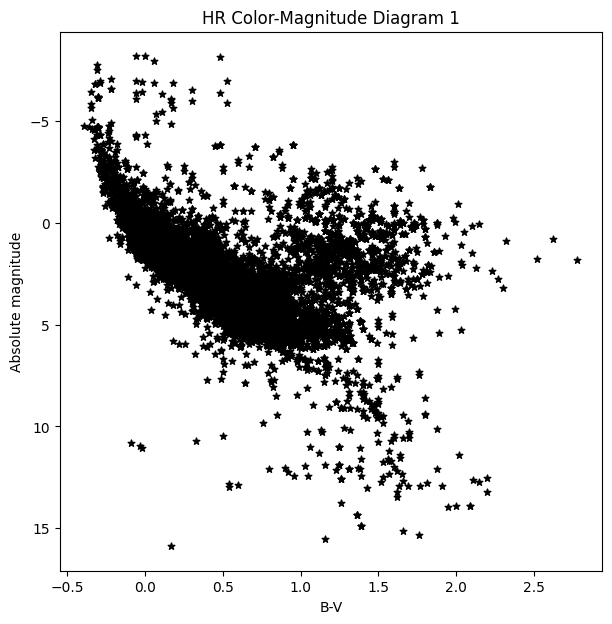

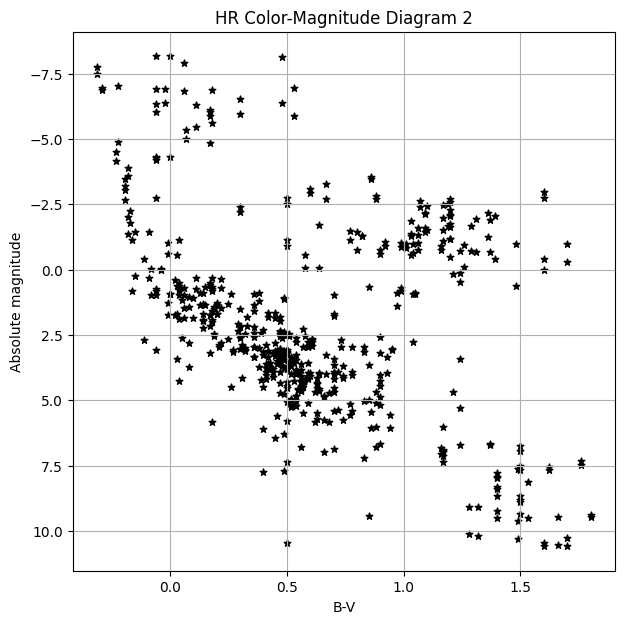

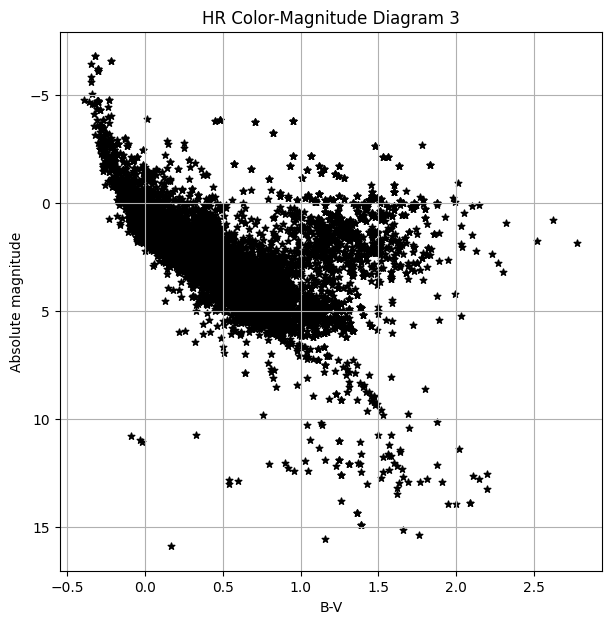

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
merged_df = pd.read_csv(  "./Data/PiskunovBinary.csv")
filtered_df1 =  pd.read_csv("./Data/FILTbinarysystem.csv")
stellar_final =  pd.read_csv("./Data/PiskunovPreprocessed.csv")
plt.figure(figsize=(7, 7))  # Set the figure size

plt.scatter(merged_df['B-V'], merged_df['Absolute Mag'], s=25,c='black', marker="*")

plt.gca().invert_yaxis()

plt.xlabel('B-V')
plt.ylabel('Absolute magnitude')
plt.title('HR Color-Magnitude Diagram 1')

plt.figure(figsize=(7, 7)) 
plt.scatter(filtered_df1['B-V'], filtered_df1['Absolute Mag'], s=25,c='black', marker="*")

plt.gca().invert_yaxis()

plt.xlabel('B-V')
plt.ylabel('Absolute magnitude')
plt.title('HR Color-Magnitude Diagram 2')

plt.grid(True)
plt.show()


plt.figure(figsize=(7, 7)) 
plt.scatter(stellar_final['B-V'], stellar_final['Absolute Mag'], s=25,c='black', marker="*")

plt.gca().invert_yaxis()

plt.xlabel('B-V')
plt.ylabel('Absolute magnitude')
plt.title('HR Color-Magnitude Diagram 3')

plt.grid(True)
plt.show()



In [3]:
filtered_df_without_n = filtered_df1[filtered_df1['SpT'] != 'n']
filtered_df_without_n['Temp(log)'] = np.log10(filtered_df_without_n['logT'])

filtered_df_without_n.tail()
filtered_df_without_n.to_csv('./Data/FilterNbinarysystem.csv', index=False)


<class 'pandas.core.series.Series'>
RangeIndex: 96741 entries, 0 to 96740
Series name: B-V
Non-Null Count  Dtype  
--------------  -----  
96741 non-null  float64
dtypes: float64(1)
memory usage: 755.9 KB
0
<class 'pandas.core.series.Series'>
RangeIndex: 96741 entries, 0 to 96740
Series name: Vmag
Non-Null Count  Dtype  
--------------  -----  
96741 non-null  float64
dtypes: float64(1)
memory usage: 755.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 96741 entries, 0 to 96740
Series name: Plx
Non-Null Count  Dtype  
--------------  -----  
93556 non-null  float64
dtypes: float64(1)
memory usage: 755.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96741 entries, 0 to 96740
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HIP             96741 non-null  int64  
 1   Vmag            96741 non-null  float64
 2   Plx             93556 non-null  float64
 3   e_Plx           96741 non-null  float64
 4 

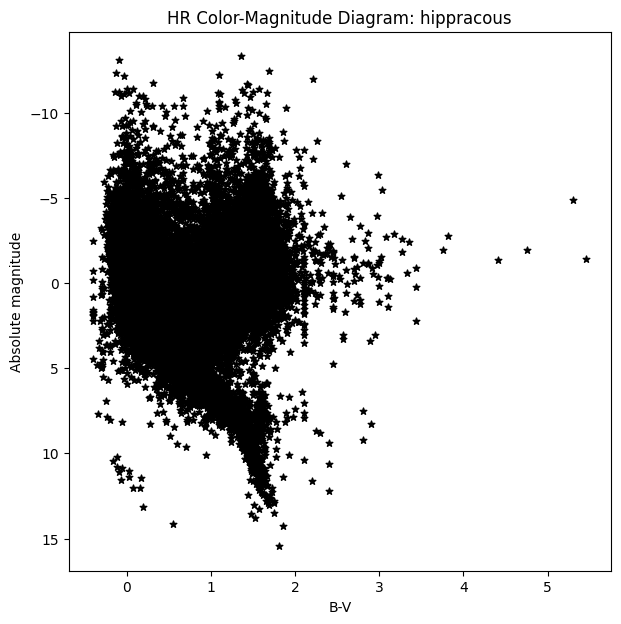

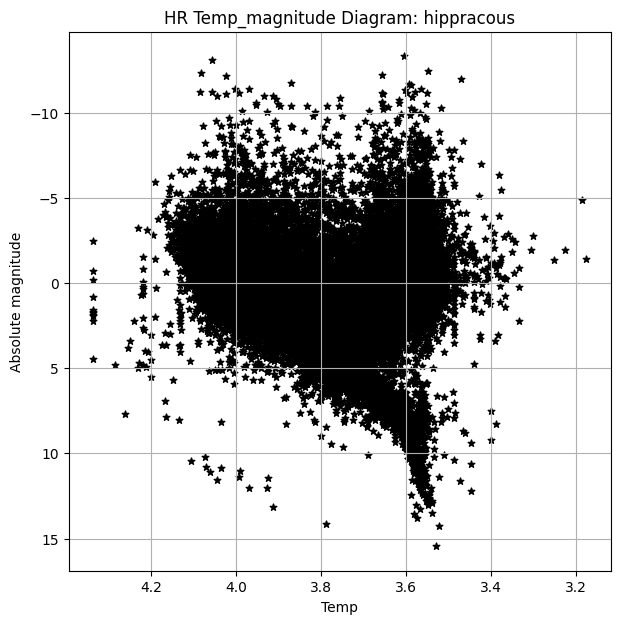

,HIP,Vmag,Plx,e_Plx,B-V,SpType,SpT,Temperature(K),logT,log.Teff [K],Distance,Absolute Mag
96736,100083,7.69,6.60,0.92,1.110,K2III,K,4493.257892,3.652561,3.652561,0.151515,1.787720
96737,100084,7.92,3.93,1.24,0.133,Am...,A,8720.653940,3.940549,3.940549,0.254453,0.891963
96738,100085,8.72,3.07,0.87,0.097,B3,B,9056.739771,3.956972,3.956972,0.325733,1.155692
96739,100087,8.08,1.07,0.68,1.094,G5,G,4527.818004,3.655889,3.655889,0.934579,-1.773081
96740,100088,6.98,2.97,0.76,-0.143,B1.5V,B,12350.588581,4.091688,4.091688,0.336700,-0.656218


In [4]:
fil2 = pd.read_csv("./Data/Hippracos10KOriginal.csv")

fil2['SpType'] = fil2['SpType']
fil2['SpT'] = fil2['SpType'].str[0]
fil2['B-V'].info()
print(fil2['B-V'].isna().sum())
fil2['Vmag'] = fil2['Vmag'].astype(float)
fil2['Plx'] = fil2['Plx'].astype(float)
fil2['B-V'] = fil2['B-V'].astype(float)
#fil2['Plx'] = fil2['Plx'].astype(float)
fil2['Temperature(K)'] = 4600 * (1 / (0.92 * fil2['B-V'] + 1.7) + 1 / (0.92 * fil2['B-V'] + 0.62))
fil2['logT'] = np.log10(fil2['Temperature(K)'])
fil2['log.Teff [K]'] = fil2['logT']
fil2["Distance"] = 1/fil2["Plx"]
fil2['Plx'] = np.where(fil2['Plx'] > 0, fil2['Plx'], np.nan)

fil2['Vmag'].info()
fil2['Plx'].info()
fil2["Absolute Mag"] = (fil2["Vmag"] + 5 * (np.log10(fil2["Plx"]/100)))
fil2.info()
fil2.to_csv('./Data/Teff_Hippracos10K.csv', index=False)

plt.figure(figsize=(7, 7)) 
plt.scatter(fil2['B-V'], fil2['Absolute Mag'], s=25,c='black', marker="*")

plt.gca().invert_yaxis()

plt.xlabel('B-V')
plt.ylabel('Absolute magnitude')
plt.title('HR Color-Magnitude Diagram: hippracous')

plt.figure(figsize=(7, 7)) 
plt.scatter(fil2['logT'], fil2['Absolute Mag'], s=25,c='black', marker="*")

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.xlabel('Temp')
plt.ylabel('Absolute magnitude')
plt.title('HR Temp_magnitude Diagram: hippracous')

plt.grid(True)
plt.show()
fil2.tail()


In [5]:
fil2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96741 entries, 0 to 96740
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HIP             96741 non-null  int64  
 1   Vmag            96741 non-null  float64
 2   Plx             93556 non-null  float64
 3   e_Plx           96741 non-null  float64
 4   B-V             96741 non-null  float64
 5   SpType          96741 non-null  object 
 6   SpT             96741 non-null  object 
 7   Temperature(K)  96741 non-null  float64
 8   logT            96741 non-null  float64
 9   log.Teff [K]    96741 non-null  float64
 10  Distance        96741 non-null  float64
 11  Absolute Mag    93556 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 8.9+ MB


In [6]:
fil2.isna().sum()

HIP                  0
Vmag                 0
Plx               3185
e_Plx                0
B-V                  0
SpType               0
SpT                  0
Temperature(K)       0
logT                 0
log.Teff [K]         0
Distance             0
Absolute Mag      3185
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SpT           546 non-null    object 
 1   Vmag          546 non-null    float64
 2   log.Teff [K]  546 non-null    float64
 3   B-V           546 non-null    float64
 4   Absolute Mag  546 non-null    float64
dtypes: float64(4), object(1)
memory usage: 21.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96741 entries, 0 to 96740
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Vmag          96741 non-null  float64
 1   B-V           96741 non-null  float64
 2   SpT           96741 non-null  object 
 3   log.Teff [K]  96741 non-null  float64
 4   Absolute Mag  93556 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data 

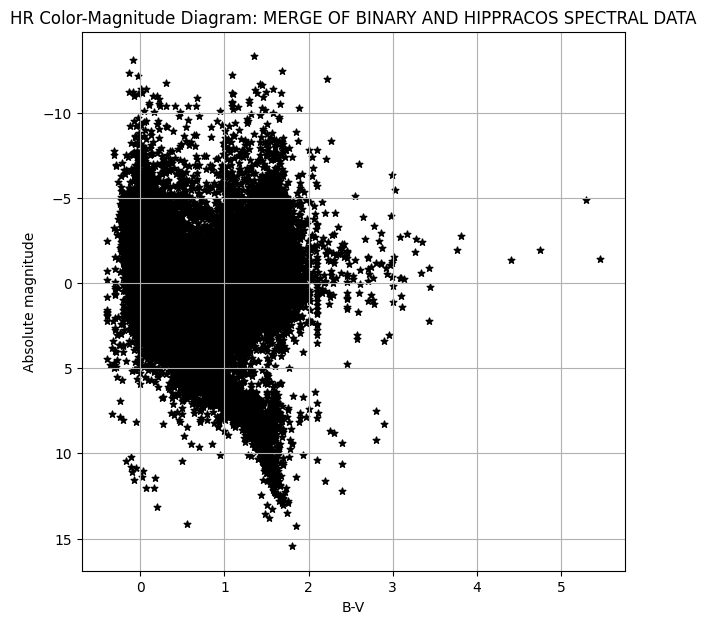

In [33]:
# merging FilterNbinarysystem.csv with spectralMAXwTemp.csv
#Binary with Hippracos data: 500 + 10,000
spectraldataM1 = pd.read_csv('./Data/FilterNbinarysystem.csv', usecols=['log.Teff [K]', 'B-V', 'Absolute Mag', 'Vmag', 'SpT'])
spectraldataM1.info()
spectraldataM2 = pd.read_csv('./Data/Teff_Hippracos10K.csv', usecols=['log.Teff [K]', 'B-V', 'Absolute Mag', 'Vmag', 'SpT'])

merSpectral_data = pd.concat([spectraldataM1, spectraldataM2], ignore_index=True)
spectraldataM2.info()

# Save the merged DataFrame to a new Excel file
merSpectral_data.to_csv('./Data/SpectralMerge.csv', index=False)
merSpectral_data.info()


plt.figure(figsize=(7, 7)) 
plt.scatter(merSpectral_data['B-V'], merSpectral_data['Absolute Mag'], s=25,c='black', marker="*")

plt.gca().invert_yaxis()

plt.xlabel('B-V')
plt.ylabel('Absolute magnitude')
plt.title('HR Color-Magnitude Diagram: MERGE OF BINARY AND HIPPRACOS SPECTRAL DATA')

plt.grid(True)
plt.show()


In [34]:
merSpectral_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SpT           97287 non-null  object 
 1   Vmag          97287 non-null  float64
 2   log.Teff [K]  97287 non-null  float64
 3   B-V           97287 non-null  float64
 4   Absolute Mag  94102 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.7+ MB


In [35]:
merSpectral_data=merSpectral_data.dropna()
merSpectral_data.isna().sum()
spd=pd.read_csv("./Data/SpectralMerge.csv")
spd['SpT'] = spd['SpT'].str[0]

spd = spd.dropna(subset=['Absolute Mag'])
# spd.to_csv("SpectralMerge.csv", index=False)
spd.info()
spd['SpT'].unique()
# total_rows = len(spd)

# half_rows = total_rows // 4
# # Randomly select half of the rows
# spdHalf = spd.sample(n=half_rows, random_state=None)
# spd.info()
# spd.isna().sum()



<class 'pandas.core.frame.DataFrame'>
Index: 94102 entries, 0 to 97286
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SpT           94102 non-null  object 
 1   Vmag          94102 non-null  float64
 2   log.Teff [K]  94102 non-null  float64
 3   B-V           94102 non-null  float64
 4   Absolute Mag  94102 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.3+ MB


array(['M', 'K', 'n', 'G', 'F', 'A', 'B', 'O', 'C', 'R', 'N', 's', 'D',
       'W', 'S', 'k', '('], dtype=object)

In [36]:
valid_labels = ['O', 'B', 'A', 'F', 'G', 'K', 'M', 'C', 'W', 'R', 'D', 'S', 'N']

spd = spd[spd['SpT'].str.upper().str.strip().str[0].isin(valid_labels) & (spd['SpT'].str.strip().str[0] != ('k' and 'n' and 's'))]
spd = spd[spd['SpT'] != 'n']

# Display the unique values
unique_values = spd["SpT"].unique()
class_counts = spd["SpT"].value_counts()
for class_label, count in class_counts.items():
    print(f"No of {class_label} in SpT: {count}")

print(unique_values)

# spdHalf = spdHalf[spdHalf['SpT'].str.upper().str.strip().str[0].isin(valid_labels) & (spdHalf['SpT'].str.strip().str[0] != 'k')]

# # Display the unique values
# unique_values = spdHalf["SpT"].unique()
# print(unique_values)

# spd.info()

No of K in SpT: 25741
No of F in SpT: 21417
No of G in SpT: 19237
No of A in SpT: 15048
No of B in SpT: 8400
No of M in SpT: 3689
No of O in SpT: 173
No of C in SpT: 104
No of R in SpT: 46
No of W in SpT: 36
No of N in SpT: 35
No of D in SpT: 21
No of S in SpT: 11
No of k in SpT: 1
['M' 'K' 'G' 'F' 'A' 'B' 'O' 'C' 'R' 'N' 'D' 'W' 'S' 'k']


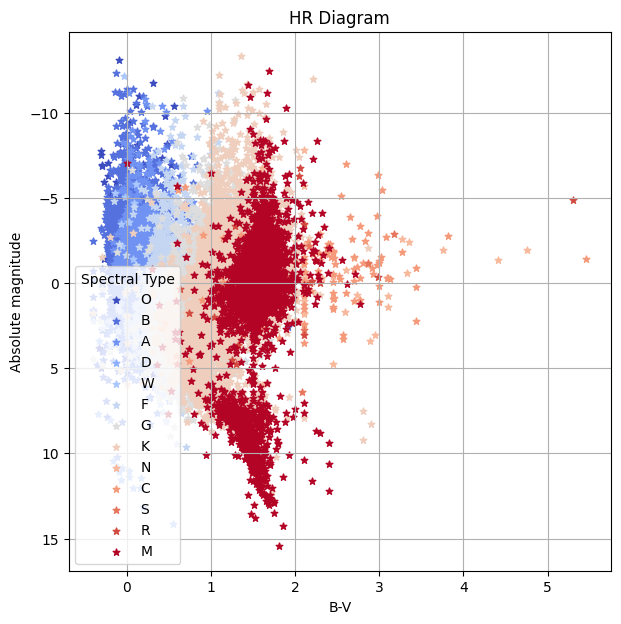

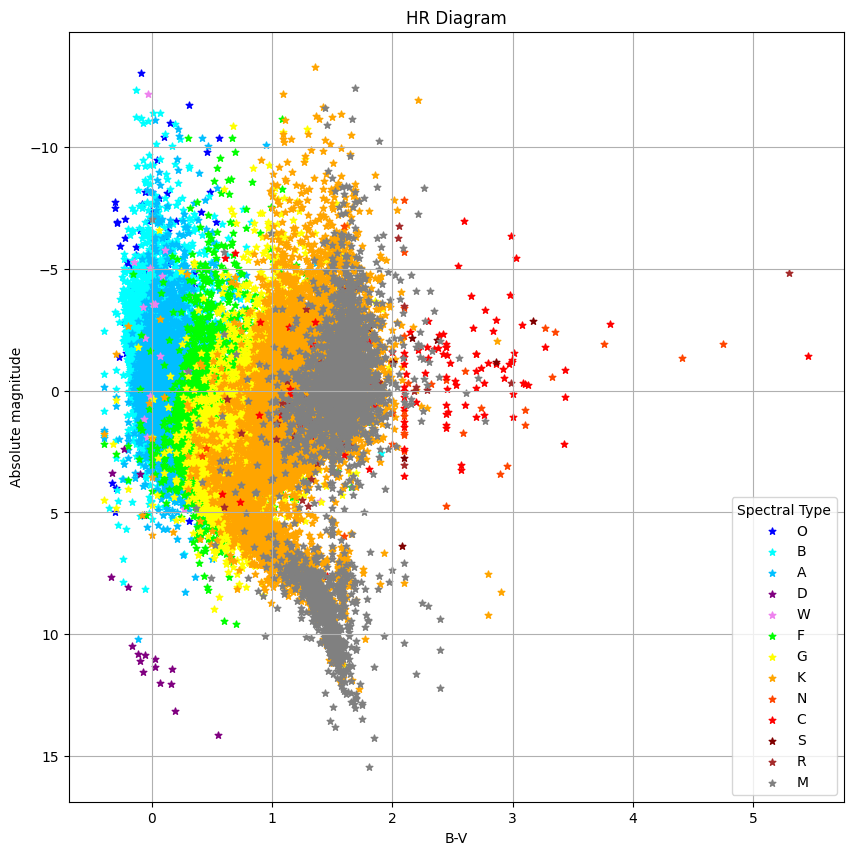

In [37]:
spectral_types = ['O', 'B', 'A', 'D', 'W', 'F', 'G', 'K','N', 'C','S' ,'R', 'M']

# Create a colormap from blue to red
colormap = plt.get_cmap('coolwarm', len(spectral_types))

# Plot the H-R diagram with colors
plt.figure(figsize=(7, 7))

for i, sp_type in enumerate(spectral_types):
    sp_type_data = spd[spd['SpT'] == sp_type]
    color = colormap(i / len(spectral_types))  # Adjust the color based on position
    plt.scatter(sp_type_data['B-V'], sp_type_data['Absolute Mag'], s=25, color=color, marker="*", label=sp_type)

plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('Absolute magnitude')
plt.title('HR Diagram')

# Add a legend to the plot to label spectral types
plt.legend(title='Spectral Type', loc='lower left')

plt.grid(True)
plt.show()
import matplotlib.pyplot as plt

# Define spectral types
spectral_types = ['O', 'B', 'A', 'D', 'W', 'F', 'G', 'K', 'N', 'C', 'S', 'R', 'M']

# Define corresponding colors for each spectral type
spectral_colors = {
    'O': 'blue',
    'B': 'cyan',
    'A': 'deepskyblue',
    'D': 'purple',
    'W': 'violet',
    'F': 'lime',
    'G': 'yellow',
    'K': 'orange',
    'N': 'orangered',
    'C': 'red',
    'S': 'maroon',
    'R': 'brown',
    'M': 'gray'
}

# Plot the H-R diagram with colors
plt.figure(figsize=(10, 10))

for sp_type in spectral_types:
    sp_type_data = spd[spd['SpT'] == sp_type]
    color = spectral_colors.get(sp_type, 'black')  # Get the color from the dictionary, default to black if not found
    plt.scatter(sp_type_data['B-V'], sp_type_data['Absolute Mag'], s=25, color=color, marker="*", label=sp_type)

plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('Absolute magnitude')
plt.title('HR Diagram')

# Add a legend to the plot to label spectral types
plt.legend(title='Spectral Type', loc='lower right')

plt.grid(True)
plt.show()


No of F in SpT: 130
No of G in SpT: 98
No of A in SpT: 71
No of B in SpT: 60
No of K in SpT: 55
No of M in SpT: 36
No of O in SpT: 11
['M' 'K' 'G' 'F' 'A' 'B' 'O']


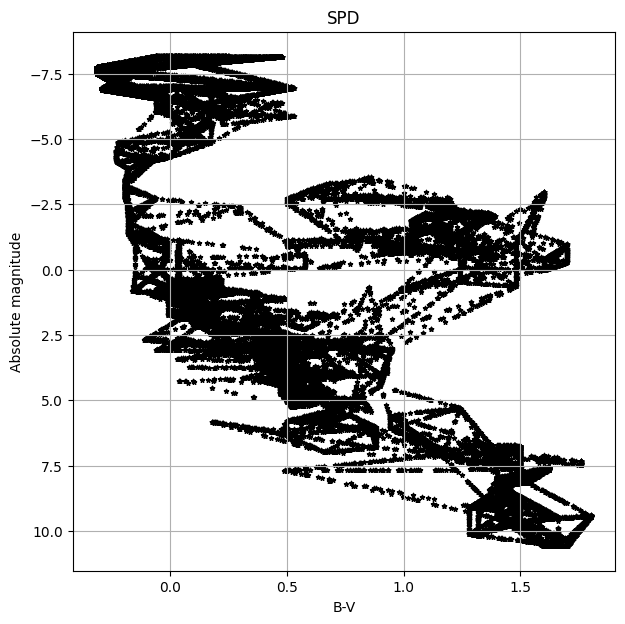

No of training 0 in SpT: 7970
No of training 2 in SpT: 4033
No of training 5 in SpT: 4014
No of training 4 in SpT: 4002
No of training 3 in SpT: 4000
No of training 6 in SpT: 3991
No of training 1 in SpT: 3990

---------------------------------------------------
No of testing 0 in SpT: 2030
No of testing 1 in SpT: 1010
No of testing 6 in SpT: 1009
No of testing 3 in SpT: 1000
No of testing 4 in SpT: 998
No of testing 5 in SpT: 986
No of testing 2 in SpT: 967


Training models:   0%|          | 0/5 [00:00<?, ?it/s]

Training Gradient Boosting:   0%|          | 0/1 [00:00<?, ?it/s]

      Iter       Train Loss   Remaining Time 
         1           1.4167            2.90m
         2           1.1385            3.14m
         3           0.9440            3.23m
         4           0.7938            3.27m
         5           0.6762            3.26m
         6           0.5816            3.26m
         7           0.5044            3.21m
         8           0.4408            3.20m
         9           0.3871            3.23m
        10           0.3413            3.19m
        20           0.1241            2.95m
        30           0.0632            2.63m
        40           0.0385            2.28m
        50           0.0269            1.92m
        60           0.0198            1.54m
        70           0.0150            1.15m
        80           0.0114           45.76s
        90           0.0090           22.89s
       100           0.0073            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.4157            2.19m
        

Training Random Forest:   0%|          | 0/1 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    8.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.1s




-------------------------Model: Random Forest-------------------------
Accuracy: 0.9995
Precision: 0.9995006812310033
Recall: 0.9995
F1 Score: 0.9994998538156917
Confusion Matrix: 
 [[2030    0    0    0    0    0    0]
 [   1 1009    0    0    0    0    0]
 [   0    0  967    0    0    0    0]
 [   0    0    0 1000    0    0    0]
 [   0    0    0    0  998    0    0]
 [   0    0    0    0    1  983    2]
 [   0    0    0    0    0    0 1009]]
Cross-Validation Accuracy: 0.9985312431609801




[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Training Support Vector Machine (SVM):   0%|          | 0/1 [00:00<?, ?it/s]

[LibSVM][LibSVM][LibSVM][LibSVM]

-------------------------Model: Support Vector Machine (SVM)-------------------------
Accuracy: 0.943625
Precision: 0.9435061953424332
Recall: 0.943625
F1 Score: 0.9433776688860768
Confusion Matrix: 
 [[2030    0    0    0    0    0    0]
 [   0  982   28    0    0    0    0]
 [   0   17  900   50    0    0    0]
 [   0    0   31  901   66    2    0]
 [   0    0    0   72  836   90    0]
 [   0    0    0   12   39  891   44]
 [   0    0    0    0    0    0 1009]]
Cross-Validation Accuracy: 0.9368125145254783




Training Logistic Regression:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\keera\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\keera\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st



-------------------------Model: Logistic Regression-------------------------
Accuracy: 0.89125
Precision: 0.8919260318405223
Recall: 0.89125
F1 Score: 0.8913131793549776
Confusion Matrix: 
 [[2030    0    0    0    0    0    0]
 [  21  932   57    0    0    0    0]
 [   0   26  864   77    0    0    0]
 [   0    4   66  824  104    2    0]
 [   0    0    0  160  745   93    0]
 [   0    0    0   14  108  797   67]
 [   0    0    0    0    0   71  938]]
Cross-Validation Accuracy: 0.8836875544620293




C:\Users\keera\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training k-Nearest Neighbors (KNN):   0%|          | 0/1 [00:00<?, ?it/s]



-------------------------Model: k-Nearest Neighbors (KNN)-------------------------
Accuracy: 0.983875
Precision: 0.983926316910459
Recall: 0.983875
F1 Score: 0.9838572859715927
Confusion Matrix: 
 [[2030    0    0    0    0    0    0]
 [   8  991   11    0    0    0    0]
 [   0    5  962    0    0    0    0]
 [   0    1    7  976   16    0    0]
 [   0    0    1   31  957    9    0]
 [   0    0    0   10   18  949    9]
 [   0    0    0    0    0    3 1006]]
Cross-Validation Accuracy: 0.9787499726138903




In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import make_scorer
from imblearn.over_sampling import SMOTE
from tqdm.notebook import tqdm_notebook as tqdm
import time
import joblib
import os

class_counts = spd["SpT"].value_counts()
for class_label, count in class_counts.items():
    print(f"No of {class_label} in SpT: {count}")

# Define the data
# Map spectral types to numerical values
spectral_type_mapping = {
    "O": 0,
    "B": 1,
    "A": 2,
    "F": 3,
    "G": 4,
    "K": 5,
    "M": 6
}
X = spd[["logL", "Mass[solMass]","Vmag","log.Teff [K]", "Absolute Mag", "B-V"]]

y = spd["SpT"].map(spectral_type_mapping)
unique_classes = spd["SpT"].unique()
print(unique_classes)

desired_oversampling_ratio1 = 10000
desired_oversampling_ratio = 5000

# desired_oversampling_ratio1 = 100

sampling_strategy = {
    0: desired_oversampling_ratio1,  # For class 'O'
    2:desired_oversampling_ratio,
    1:desired_oversampling_ratio,
    3:desired_oversampling_ratio,
    4:desired_oversampling_ratio,
    5:desired_oversampling_ratio,
    6:desired_oversampling_ratio,
    # 6: desired_oversampling_ratio
}

# Create a SMOTE instance to oversample the specified classes
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(7, 7)) 
plt.scatter(X_resampled['B-V'], X_resampled['Absolute Mag'], s=10,c='black', marker="*")

plt.gca().invert_yaxis()

plt.xlabel('B-V')
plt.ylabel('Absolute magnitude')
plt.title('SPD')

plt.grid(True)
plt.show()

# Split the data into training and testing sets after oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Add the features you want to use for prediction
selected_features = ["logL","Mass[solMass]","Vmag","log.Teff [K]", "Absolute Mag", "B-V"]


X_train = X_train[selected_features]
X_test = X_test[selected_features]

class_counts = y_train.value_counts()
for class_label, count in class_counts.items():
    print(f"No of training {class_label} in SpT: {count}")
print('\n---------------------------------------------------')
class_counts = y_test.value_counts()
for class_label, count in class_counts.items():
    print(f"No of testing {class_label} in SpT: {count}")
# Create a list of models to train
models = [
    ('Gradient Boosting', GradientBoostingClassifier(verbose=1, n_estimators=100, random_state=42)),
    ('Random Forest', RandomForestClassifier(verbose=1, n_estimators=100, random_state=42)),
    ('Support Vector Machine (SVM)', SVC(verbose=1, kernel='linear')),
    ('Logistic Regression', LogisticRegression(verbose=1, max_iter=2000)),
    ('k-Nearest Neighbors (KNN)', KNeighborsClassifier(n_neighbors=20))
]
output_folder = "./SpectralPredictionModels"
# Split the data and train each model on resampled data
for model_name, model in tqdm(models, desc="Training models"):
    with tqdm(total=1, desc=f"Training {model_name}") as pbar:
        pbar.n = 0
        pbar.last_print_n = 0
        pbar.start_t = pbar.last_print_t = time.time()
        pbar.update(1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)
        cross_val_scores = cross_val_score(model, X_train, y_train, cv=3, scoring=make_scorer(accuracy_score))
        # Create the full path to save the model
        model_path = os.path.join(output_folder, f'{model_name}.pkl')
        
        # Save the model to the specified folder
        joblib.dump(model, model_path)        
        print("\n")
        print(f"-------------------------Model: {model_name}-------------------------")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"Confusion Matrix: \n {cm}")
        print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")
        print("\n")


In [43]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(6,)))
    # Tune the number of hidden layers and units
    for i in range(hp.Int('num_layers', 2, 4)):
        # Choose the activation function from a list
        activation = hp.Choice('activation', values=['tanh'])
        model.add(layers.Dense(units=hp.Int('units_' + str(i), max_value=128, min_value=8, step=32), activation=activation))

    model.add(layers.Dense(7, activation='softmax'))
    opt = keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2]))
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # You can adjust the number of trials
    directory='tuner_logs',  # A directory to store logs and results
    project_name='spectral_classification'
)

tuner.search(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=15, batch_size=64)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps.values)
final_model = build_model(best_hps)


Trial 8 Complete [00h 00m 35s]
val_accuracy: 0.953249990940094

Best val_accuracy So Far: 0.9836249947547913
Total elapsed time: 00h 03m 57s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
2                 |4                 |num_layers
tanh              |tanh              |activation
104               |40                |units_0
72                |8                 |units_1
0.01              |0.01              |learning_rate
8                 |40                |units_2
104               |104               |units_3

Epoch 1/15
500/500 [==============================] - 3s 5ms/step - loss: 0.2750 - accuracy: 0.8919 - val_loss: 0.1536 - val_accuracy: 0.9398
Epoch 2/15
500/500 [==============================] - 2s 4ms/step - loss: 0.1408 - accuracy: 0.9460 - val_loss: 0.1258 - val_accuracy: 0.9438
Epoch 3/15
500/500 [==============================] - 2s 4ms/step - loss: 0.1174 - accuracy: 0.9552 - val_loss: 0.1301 - val_accuracy: 0.9559
Epoch 4/15
500/500

KeyboardInterrupt: 

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, models
import joblib
from imblearn.over_sampling import SMOTE

spectral_type_mapping = {
    "O": 0,
    "B": 1,
    "A": 2,
    "F": 3,
    "G": 4,
    "K": 5,
    "M": 6
}

y = spd["SpT"].map(spectral_type_mapping)
X = spd[["logL", "Mass[solMass]","Vmag","log.Teff [K]", "Absolute Mag", "B-V"]]
spd["SpT"].isna().sum()
spd["SpT"].unique()

desired_oversampling_ratio1 = 10000
desired_oversampling_ratio = 5000

# desired_oversampling_ratio1 = 100

sampling_strategy = {
    0: desired_oversampling_ratio1,  # For class 'O'
    2:desired_oversampling_ratio,
    1:desired_oversampling_ratio,
    3:desired_oversampling_ratio,
    4:desired_oversampling_ratio,
    5:desired_oversampling_ratio,
    6:desired_oversampling_ratio,
    # 6: desired_oversampling_ratio
}

# Create a SMOTE instance to oversample the specified classes
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,  y_resampled, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define a neural network model
neural_net = models.Sequential([
    #layers.Input(shape=(X_train_pca.shape[1])),  # Input layer with reduced features
    layers.Input(shape=(6,)),
    layers.Dense(129, activation='tanh'),  # Hidden layer with 64 neurons and tanh activation
    layers.Dense(65, activation='tanh'),  # Hidden layer with 32 neurons and tanh activation
    layers.Dense(33, activation='tanh'),  # Hidden layer with 32 neurons and tanh activation
    layers.Dense(7, activation='softmax')  # Output layer with 7 neurons (for spectral classes) and softmax activation
])

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.001)
neural_net.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
neural_net.fit(X_train_pca, y_train, epochs=70, batch_size=32, validation_split=0.4)

# Evaluate the model on the test set
test_loss, test_accuracy = neural_net.evaluate(X_test_pca, y_test)
print(f"Test accuracy: {test_accuracy}")

# Define the number of splits for cross-validation
k = 3

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store cross-validation scores
cv_scores = []
# Perform cross-validation
for train_index, test_index in skf.split(X_train_pca, y_train):
    X_train_cv, X_test_cv = X_train_pca[train_index], X_train_pca[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]  # Corrected

    # Train the model on the training data
    neural_net.fit(X_train_cv, y_train_cv, epochs=20, batch_size=32, verbose=0)

    # Evaluate the model on the test data
    _, accuracy = neural_net.evaluate(X_test_cv, y_test_cv, verbose=0)
    cv_scores.append(accuracy)


# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in skf.split(X_train_pca, y_train):
    X_train_cv, X_test_cv = X_train_pca[train_index], X_train_pca[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    # Train the model on the training data
    neural_net.fit(X_train_cv, y_train_cv, epochs=20, batch_size=64, verbose=0)

    # Evaluate the model on the test data
    _, accuracy = neural_net.evaluate(X_test_cv, y_test_cv, verbose=0)
    cv_scores.append(accuracy)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))
# tf.test.is_gpu_available()
from sklearn.metrics import confusion_matrix

# Assuming your model is already trained, you can make predictions on the test data
y_pred = neural_net.predict(X_test_pca)
# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/70
600/600 [==============================] - 5s 6ms/step - loss: 0.4720 - accuracy: 0.8270 - val_loss: 0.2866 - val_accuracy: 0.9022
Epoch 2/70
600/600 [==============================] - 4s 6ms/step - loss: 0.2378 - accuracy: 0.9136 - val_loss: 0.1987 - val_accuracy: 0.9291
Epoch 3/70
600/600 [==============================] - 4s 6ms/step - loss: 0.1832 - accuracy: 0.9333 - val_loss: 0.1877 - val_accuracy: 0.9234
Epoch 4/70
600/600 [==============================] - 4s 6ms/step - loss: 0.1441 - accuracy: 0.9472 - val_loss: 0.1312 - val_accuracy: 0.9491
Epoch 5/70
600/600 [==============================] - 4s 6ms/step - loss: 0.1178 - accuracy: 0.9558 - val_loss: 0.1284 - val_accuracy: 0.9475
Epoch 6/70
600/600 [==============================] - 4s 6ms/step - loss: 0.1042 - accuracy: 0.9614 - val_loss: 0.1008 - val_accuracy: 0.9585
Epoch 7/70
600/600 [==============================] - 3s 6ms/step - loss: 0.0891 - accuracy: 0.9666 - val_loss: 0.0907 - val_accuracy: 0.9663
Epoch 

KeyError: '[1, 13, 23, 40, 52, 53, 69, 70, 75, 83, 86, 89, 90, 96, 119, 120, 128, 134, 144, 180, 186, 187, 194, 196, 198, 200, 210, 212, 216, 239, 241, 248, 252, 261, 262, 263, 264, 268, 273, 274, 277, 278, 279, 308, 312, 313, 314, 316, 317, 322, 334, 343, 354, 361, 369, 374, 376, 377, 378, 416, 428, 438, 447, 460, 464, 465, 469, 470, 479, 480, 501, 505, 509, 512, 516, 532, 550, 564, 578, 584, 593, 608, 618, 621, 623, 626, 628, 631, 640, 647, 664, 681, 682, 686, 697, 702, 708, 709, 710, 724, 725, 733, 738, 742, 748, 756, 758, 764, 772, 779, 791, 800, 816, 827, 831, 842, 843, 850, 853, 857, 861, 873, 879, 884, 896, 898, 902, 904, 911, 918, 919, 927, 942, 943, 953, 959, 960, 962, 963, 967, 977, 979, 980, 991, 1012, 1029, 1033, 1039, 1043, 1045, 1048, 1053, 1061, 1072, 1090, 1092, 1107, 1108, 1109, 1113, 1114, 1122, 1139, 1162, 1165, 1166, 1174, 1179, 1182, 1183, 1188, 1204, 1213, 1232, 1240, 1248, 1270, 1275, 1278, 1282, 1285, 1288, 1296, 1318, 1319, 1323, 1331, 1337, 1339, 1346, 1366, 1383, 1390, 1392, 1396, 1398, 1411, 1412, 1416, 1418, 1423, 1427, 1430, 1433, 1442, 1451, 1453, 1456, 1457, 1464, 1465, 1467, 1478, 1483, 1487, 1491, 1496, 1500, 1503, 1512, 1513, 1516, 1520, 1536, 1549, 1553, 1557, 1562, 1575, 1576, 1588, 1594, 1599, 1638, 1640, 1647, 1661, 1662, 1668, 1670, 1673, 1681, 1682, 1687, 1696, 1697, 1703, 1704, 1710, 1732, 1736, 1741, 1758, 1763, 1786, 1788, 1793, 1796, 1808, 1846, 1856, 1863, 1866, 1871, 1876, 1882, 1888, 1896, 1900, 1901, 1905, 1918, 1930, 1962, 1981, 1993, 1994, 2000, 2001, 2007, 2008, 2009, 2029, 2041, 2055, 2074, 2081, 2091, 2095, 2109, 2111, 2117, 2119, 2133, 2135, 2138, 2142, 2149, 2150, 2158, 2168, 2174, 2185, 2207, 2215, 2229, 2231, 2236, 2237, 2240, 2254, 2255, 2266, 2273, 2275, 2277, 2286, 2290, 2295, 2296, 2306, 2308, 2310, 2312, 2322, 2323, 2325, 2331, 2342, 2344, 2346, 2348, 2350, 2351, 2357, 2362, 2363, 2383, 2385, 2434, 2436, 2437, 2440, 2448, 2457, 2464, 2494, 2496, 2499, 2505, 2507, 2510, 2518, 2525, 2531, 2547, 2548, 2554, 2561, 2571, 2578, 2588, 2592, 2602, 2608, 2617, 2622, 2633, 2635, 2638, 2644, 2650, 2658, 2672, 2680, 2683, 2705, 2730, 2731, 2733, 2735, 2743, 2744, 2746, 2752, 2754, 2757, 2767, 2772, 2791, 2799, 2814, 2825, 2826, 2828, 2830, 2847, 2857, 2863, 2865, 2867, 2868, 2874, 2879, 2893, 2894, 2896, 2907, 2952, 2958, 2960, 2974, 2980, 2982, 3000, 3001, 3002, 3021, 3031, 3035, 3038, 3056, 3058, 3067, 3068, 3069, 3074, 3077, 3102, 3104, 3105, 3106, 3108, 3113, 3115, 3150, 3154, 3160, 3161, 3177, 3184, 3189, 3193, 3202, 3208, 3211, 3214, 3220, 3226, 3230, 3242, 3243, 3245, 3248, 3250, 3252, 3263, 3265, 3269, 3277, 3281, 3286, 3288, 3290, 3315, 3318, 3337, 3375, 3386, 3396, 3416, 3418, 3425, 3431, 3434, 3441, 3451, 3455, 3460, 3461, 3474, 3489, 3502, 3519, 3525, 3539, 3541, 3564, 3566, 3568, 3580, 3584, 3589, 3592, 3593, 3594, 3601, 3604, 3615, 3619, 3623, 3633, 3635, 3645, 3660, 3673, 3693, 3697, 3698, 3704, 3715, 3719, 3732, 3734, 3735, 3737, 3758, 3761, 3781, 3785, 3789, 3799, 3820, 3826, 3829, 3833, 3834, 3835, 3836, 3839, 3840, 3842, 3843, 3850, 3852, 3855, 3861, 3875, 3876, 3886, 3893, 3905, 3914, 3915, 3916, 3922, 3923, 3929, 3933, 3935, 3938, 3942, 3944, 3945, 3946, 3979, 3986, 3988, 4009, 4028, 4032, 4034, 4040, 4045, 4047, 4057, 4058, 4068, 4082, 4093, 4140, 4146, 4148, 4152, 4156, 4157, 4165, 4168, 4169, 4170, 4178, 4181, 4199, 4201, 4207, 4217, 4219, 4229, 4235, 4237, 4241, 4246, 4253, 4265, 4269, 4273, 4280, 4283, 4305, 4308, 4325, 4335, 4341, 4342, 4384, 4387, 4393, 4400, 4410, 4416, 4420, 4430, 4448, 4449, 4455, 4463, 4468, 4469, 4480, 4504, 4506, 4518, 4519, 4523, 4526, 4550, 4562, 4563, 4564, 4569, 4571, 4573, 4579, 4580, 4589, 4592, 4602, 4613, 4615, 4619, 4620, 4638, 4641, 4650, 4657, 4667, 4679, 4689, 4699, 4707, 4724, 4726, 4730, 4737, 4741, 4751, 4756, 4771, 4772, 4775, 4800, 4815, 4817, 4844, 4845, 4850, 4851, 4859, 4867, 4877, 4884, 4890, 4903, 4918, 4921, 4932, 4943, 4952, 4955, 4962, 4968, 4974, 4985, 4990, 4998, 5001, 5011, 5018, 5020, 5030, 5035, 5045, 5048, 5053, 5068, 5071, 5076, 5078, 5100, 5102, 5128, 5129, 5134, 5140, 5144, 5152, 5157, 5159, 5170, 5179, 5186, 5195, 5198, 5201, 5211, 5215, 5216, 5218, 5226, 5227, 5233, 5262, 5288, 5292, 5304, 5306, 5321, 5325, 5336, 5341, 5343, 5352, 5354, 5356, 5357, 5360, 5371, 5373, 5377, 5382, 5384, 5386, 5394, 5395, 5401, 5434, 5455, 5457, 5466, 5478, 5484, 5488, 5501, 5503, 5504, 5508, 5513, 5525, 5532, 5535, 5536, 5549, 5553, 5557, 5567, 5570, 5576, 5579, 5646, 5654, 5657, 5662, 5667, 5683, 5685, 5686, 5687, 5694, 5705, 5707, 5712, 5715, 5726, 5732, 5735, 5740, 5742, 5746, 5749, 5751, 5754, 5762, 5770, 5775, 5787, 5809, 5815, 5822, 5824, 5836, 5841, 5847, 5859, 5864, 5865, 5874, 5881, 5883, 5886, 5910, 5911, 5916, 5923, 5954, 5959, 5987, 5989, 5991, 6013, 6014, 6036, 6043, 6046, 6049, 6056, 6062, 6108, 6111, 6112, 6119, 6134, 6137, 6146, 6164, 6165, 6169, 6179, 6186, 6188, 6193, 6194, 6199, 6215, 6224, 6225, 6231, 6233, 6237, 6245, 6252, 6253, 6262, 6267, 6271, 6272, 6275, 6282, 6293, 6316, 6319, 6324, 6326, 6328, 6340, 6354, 6365, 6366, 6388, 6390, 6394, 6399, 6400, 6401, 6404, 6415, 6418, 6420, 6424, 6426, 6432, 6434, 6442, 6465, 6480, 6482, 6491, 6492, 6496, 6514, 6515, 6521, 6524, 6527, 6529, 6535, 6550, 6551, 6556, 6580, 6585, 6592, 6596, 6603, 6604, 6612, 6631, 6633, 6646, 6650, 6660, 6662, 6663, 6675, 6682, 6689, 6698, 6700, 6705, 6725, 6736, 6742, 6746, 6747, 6753, 6757, 6759, 6778, 6793, 6802, 6809, 6813, 6814, 6824, 6832, 6835, 6839, 6868, 6870, 6871, 6874, 6882, 6887, 6888, 6890, 6892, 6898, 6899, 6904, 6912, 6914, 6915, 6921, 6923, 6926, 6936, 6946, 6969, 6978, 6988, 6994, 6996, 7024, 7030, 7040, 7070, 7090, 7096, 7100, 7109, 7119, 7142, 7154, 7162, 7191, 7201, 7212, 7231, 7237, 7250, 7251, 7264, 7266, 7277, 7289, 7294, 7298, 7301, 7306, 7315, 7323, 7327, 7330, 7335, 7336, 7337, 7339, 7364, 7369, 7388, 7401, 7402, 7411, 7414, 7419, 7427, 7438, 7448, 7449, 7462, 7475, 7478, 7487, 7497, 7503, 7516, 7524, 7528, 7555, 7557, 7560, 7563, 7565, 7568, 7571, 7573, 7576, 7578, 7579, 7580, 7592, 7594, 7600, 7602, 7605, 7609, 7613, 7615, 7638, 7640, 7643, 7646, 7650, 7652, 7653, 7672, 7678, 7679, 7680, 7686, 7701, 7718, 7721, 7722, 7725, 7729, 7732, 7738, 7743, 7745, 7753, 7780, 7800, 7809, 7811, 7817, 7827, 7831, 7836, 7840, 7852, 7861, 7870, 7880, 7886, 7892, 7893, 7901, 7905, 7908, 7920, 7932, 7937, 7945, 7947, 7948, 7949, 7950, 7969, 7974, 7980, 7981, 7984, 7986, 7989, 7998, 8006, 8020, 8021, 8022, 8028, 8037, 8049, 8054, 8057, 8059, 8085, 8090, 8091, 8099, 8116, 8132, 8135, 8140, 8145, 8147, 8153, 8156, 8161, 8170, 8188, 8191, 8193, 8194, 8200, 8206, 8231, 8238, 8239, 8241, 8247, 8249, 8256, 8270, 8274, 8277, 8279, 8288, 8295, 8304, 8321, 8326, 8331, 8339, 8341, 8350, 8357, 8358, 8362, 8363, 8368, 8374, 8375, 8388, 8393, 8406, 8413, 8416, 8421, 8435, 8442, 8445, 8471, 8476, 8489, 8494, 8500, 8508, 8510, 8517, 8528, 8537, 8541, 8552, 8560, 8561, 8564, 8565, 8569, 8570, 8586, 8610, 8613, 8618, 8648, 8690, 8713, 8718, 8723, 8726, 8729, 8735, 8739, 8761, 8765, 8768, 8777, 8786, 8795, 8807, 8821, 8829, 8840, 8844, 8845, 8857, 8858, 8869, 8871, 8879, 8889, 8891, 8895, 8897, 8904, 8908, 8913, 8919, 8920, 8923, 8925, 8929, 8931, 8932, 8944, 8960, 8961, 8966, 8976, 8982, 8986, 8993, 9000, 9008, 9016, 9027, 9035, 9040, 9055, 9057, 9058, 9087, 9097, 9100, 9103, 9126, 9132, 9134, 9150, 9152, 9159, 9163, 9164, 9165, 9169, 9183, 9192, 9205, 9206, 9207, 9211, 9235, 9237, 9240, 9253, 9254, 9270, 9282, 9285, 9289, 9291, 9296, 9298, 9303, 9312, 9317, 9349, 9353, 9354, 9366, 9370, 9378, 9381, 9398, 9403, 9419, 9426, 9441, 9444, 9448, 9464, 9473, 9480, 9512, 9523, 9532, 9535, 9538, 9548, 9564, 9565, 9568, 9577, 9590, 9595, 9606, 9621, 9632, 9645, 9648, 9658, 9661, 9667, 9681, 9682, 9687, 9694, 9701, 9702, 9708, 9728, 9731, 9736, 9738, 9739, 9743, 9747, 9753, 9761, 9766, 9779, 9790, 9792, 9793, 9798, 9801, 9803, 9810, 9826, 9830, 9831, 9841, 9842, 9856, 9876, 9880, 9898, 9920, 9931, 9932, 9936, 9974, 9975, 9976, 9985, 9986, 9992, 9997, 10013, 10030, 10031, 10035, 10036, 10045, 10050, 10059, 10062, 10063, 10065, 10075, 10081, 10098, 10115, 10132, 10138, 10146, 10151, 10153, 10157, 10171, 10178, 10183, 10192, 10198, 10202, 10214, 10217, 10221, 10226, 10229, 10277, 10279, 10287, 10289, 10299, 10311, 10320, 10324, 10331, 10333, 10339, 10351, 10354, 10356, 10359, 10389, 10393, 10413, 10423, 10424, 10428, 10430, 10444, 10454, 10463, 10465, 10470, 10476, 10477, 10496, 10500, 10508, 10520, 10536, 10539, 10552, 10560, 10562, 10575, 10580, 10591, 10593, 10601, 10612, 10622, 10630, 10648, 10669, 10675, 10696, 10700, 10708, 10709, 10718, 10721, 10734, 10735, 10741, 10742, 10746, 10765, 10771, 10812, 10821, 10827, 10829, 10840, 10843, 10849, 10850, 10859, 10865, 10873, 10874, 10876, 10880, 10881, 10882, 10887, 10890, 10904, 10925, 10926, 10930, 10949, 10955, 10959, 10969, 10990, 10994, 11011, 11014, 11015, 11029, 11056, 11060, 11069, 11070, 11072, 11076, 11082, 11104, 11107, 11127, 11128, 11131, 11146, 11177, 11187, 11189, 11191, 11198, 11204, 11206, 11208, 11212, 11222, 11237, 11238, 11239, 11259, 11265, 11275, 11309, 11313, 11318, 11327, 11331, 11342, 11355, 11416, 11418, 11430, 11436, 11448, 11450, 11470, 11477, 11484, 11487, 11489, 11501, 11504, 11507, 11510, 11511, 11543, 11550, 11551, 11558, 11562, 11567, 11570, 11583, 11597, 11605, 11625, 11635, 11636, 11641, 11642, 11699, 11710, 11713, 11734, 11742, 11754, 11756, 11757, 11770, 11778, 11779, 11790, 11791, 11797, 11798, 11807, 11810, 11813, 11815, 11821, 11832, 11834, 11843, 11849, 11852, 11854, 11857, 11858, 11863, 11865, 11868, 11872, 11893, 11895, 11897, 11904, 11912, 11917, 11919, 11941, 11947, 11958, 11960, 11968, 11976, 11990, 11997, 12013, 12029, 12036, 12042, 12044, 12050, 12051, 12053, 12058, 12063, 12065, 12068, 12079, 12080, 12085, 12104, 12107, 12114, 12116, 12133, 12138, 12140, 12141, 12144, 12154, 12157, 12160, 12168, 12179, 12187, 12208, 12212, 12214, 12216, 12230, 12233, 12234, 12235, 12240, 12248, 12249, 12261, 12272, 12286, 12301, 12309, 12310, 12322, 12327, 12335, 12341, 12348, 12358, 12369, 12372, 12384, 12387, 12418, 12421, 12422, 12426, 12430, 12451, 12461, 12472, 12481, 12484, 12487, 12494, 12503, 12505, 12507, 12515, 12522, 12527, 12528, 12532, 12539, 12556, 12573, 12574, 12584, 12596, 12599, 12613, 12623, 12629, 12630, 12637, 12640, 12642, 12659, 12662, 12681, 12690, 12701, 12706, 12724, 12732, 12736, 12758, 12760, 12783, 12784, 12790, 12793, 12795, 12799, 12802, 12832, 12859, 12865, 12883, 12885, 12887, 12893, 12913, 12918, 12921, 12923, 12928, 12932, 12933, 12946, 12949, 12954, 12955, 12958, 12969, 12990, 13014, 13019, 13022, 13033, 13035, 13039, 13053, 13064, 13070, 13075, 13082, 13086, 13094, 13095, 13098, 13099, 13120, 13124, 13148, 13150, 13151, 13160, 13174, 13177, 13185, 13192, 13197, 13199, 13204, 13205, 13208, 13247, 13252, 13253, 13256, 13278, 13287, 13299, 13312, 13316, 13330, 13332, 13352, 13353, 13356, 13363, 13370, 13374, 13377, 13387, 13389, 13390, 13399, 13415, 13424, 13430, 13451, 13452, 13468, 13477, 13488, 13497, 13504, 13505, 13511, 13517, 13525, 13529, 13542, 13544, 13549, 13557, 13561, 13573, 13581, 13589, 13596, 13604, 13618, 13623, 13624, 13634, 13637, 13641, 13651, 13653, 13658, 13664, 13670, 13674, 13676, 13680, 13681, 13685, 13694, 13724, 13728, 13734, 13754, 13756, 13766, 13793, 13800, 13802, 13804, 13815, 13816, 13819, 13822, 13823, 13825, 13832, 13834, 13835, 13837, 13852, 13857, 13883, 13915, 13924, 13941, 13949, 13952, 13953, 13954, 13956, 13958, 13962, 13969, 13972, 13974, 13976, 13983, 13984, 13991, 14005, 14006, 14009, 14018, 14023, 14029, 14040, 14044, 14053, 14054, 14061, 14064, 14073, 14077, 14083, 14085, 14090, 14095, 14113, 14117, 14124, 14125, 14129, 14131, 14132, 14145, 14156, 14165, 14168, 14177, 14182, 14194, 14200, 14206, 14216, 14243, 14261, 14264, 14272, 14273, 14275, 14280, 14283, 14295, 14300, 14302, 14303, 14313, 14320, 14326, 14335, 14348, 14355, 14360, 14381, 14383, 14384, 14386, 14398, 14402, 14416, 14421, 14428, 14442, 14443, 14445, 14446, 14447, 14452, 14453, 14470, 14471, 14473, 14474, 14488, 14494, 14495, 14499, 14501, 14505, 14508, 14518, 14524, 14526, 14528, 14540, 14545, 14553, 14555, 14558, 14563, 14565, 14575, 14583, 14584, 14592, 14597, 14607, 14611, 14615, 14632, 14644, 14646, 14655, 14657, 14658, 14667, 14668, 14673, 14695, 14696, 14704, 14710, 14736, 14740, 14742, 14749, 14756, 14759, 14763, 14773, 14774, 14775, 14777, 14783, 14784, 14796, 14822, 14827, 14833, 14836, 14843, 14844, 14848, 14856, 14857, 14861, 14867, 14872, 14875, 14880, 14889, 14894, 14897, 14898, 14914, 14917, 14926, 14933, 14946, 14948, 14978, 14989, 15002, 15010, 15011, 15016, 15017, 15020, 15022, 15024, 15030, 15045, 15102, 15108, 15112, 15113, 15117, 15118, 15124, 15125, 15130, 15135, 15137, 15146, 15165, 15168, 15170, 15188, 15189, 15199, 15209, 15214, 15215, 15220, 15232, 15238, 15239, 15241, 15243, 15258, 15259, 15267, 15273, 15280, 15283, 15286, 15289, 15306, 15311, 15322, 15331, 15334, 15335, 15341, 15351, 15353, 15361, 15363, 15368, 15375, 15392, 15394, 15395, 15397, 15415, 15418, 15420, 15421, 15433, 15468, 15469, 15475, 15476, 15483, 15484, 15497, 15518, 15521, 15532, 15547, 15550, 15558, 15575, 15576, 15590, 15594, 15601, 15602, 15603, 15606, 15607, 15609, 15614, 15621, 15625, 15656, 15673, 15676, 15686, 15711, 15714, 15718, 15726, 15727, 15731, 15740, 15746, 15747, 15750, 15751, 15771, 15825, 15841, 15842, 15851, 15865, 15877, 15884, 15894, 15895, 15897, 15902, 15910, 15912, 15914, 15920, 15922, 15937, 15947, 15959, 15961, 15980, 15983, 15998, 16000, 16003, 16026, 16030, 16036, 16041, 16064, 16071, 16098, 16104, 16113, 16118, 16124, 16125, 16135, 16141, 16145, 16166, 16177, 16178, 16179, 16180, 16181, 16188, 16221, 16233, 16253, 16255, 16262, 16269, 16270, 16274, 16286, 16293, 16294, 16297, 16298, 16305, 16328, 16329, 16345, 16349, 16356, 16359, 16366, 16367, 16416, 16420, 16421, 16423, 16425, 16429, 16432, 16437, 16441, 16451, 16467, 16486, 16487, 16497, 16501, 16507, 16511, 16551, 16577, 16594, 16602, 16606, 16615, 16621, 16631, 16634, 16637, 16666, 16674, 16675, 16703, 16718, 16719, 16735, 16739, 16751, 16758, 16764, 16768, 16773, 16776, 16780, 16781, 16794, 16796, 16797, 16801, 16810, 16826, 16831, 16866, 16869, 16872, 16875, 16887, 16889, 16894, 16900, 16902, 16904, 16908, 16909, 16912, 16914, 16921, 16930, 16942, 16947, 16953, 16963, 16982, 16987, 16993, 17023, 17031, 17034, 17039, 17041, 17047, 17048, 17054, 17056, 17075, 17078, 17079, 17082, 17089, 17102, 17115, 17117, 17122, 17128, 17141, 17160, 17176, 17191, 17202, 17203, 17208, 17212, 17213, 17227, 17228, 17233, 17239, 17240, 17250, 17258, 17259, 17287, 17298, 17305, 17315, 17318, 17329, 17344, 17348, 17367, 17386, 17405, 17407, 17410, 17411, 17431, 17439, 17447, 17455, 17460, 17466, 17479, 17483, 17496, 17497, 17503, 17516, 17520, 17526, 17537, 17538, 17542, 17547, 17559, 17561, 17609, 17626, 17631, 17636, 17644, 17663, 17668, 17678, 17679, 17687, 17698, 17704, 17707, 17714, 17721, 17724, 17728, 17731, 17751, 17756, 17784, 17795, 17799, 17808, 17817, 17827, 17831, 17840, 17841, 17846, 17854, 17865, 17877, 17911, 17912, 17914, 17935, 17953, 17956, 17961, 17964, 17969, 17987, 17995, 17999, 18002, 18009, 18010, 18012, 18035, 18045, 18046, 18053, 18068, 18080, 18084, 18090, 18097, 18106, 18111, 18112, 18115, 18119, 18121, 18124, 18152, 18154, 18160, 18167, 18172, 18188, 18189, 18190, 18191, 18192, 18194, 18195, 18203, 18206, 18233, 18238, 18253, 18264, 18266, 18267, 18270, 18273, 18285, 18291, 18294, 18304, 18306, 18307, 18308, 18310, 18314, 18317, 18332, 18334, 18335, 18338, 18349, 18363, 18365, 18368, 18370, 18387, 18388, 18393, 18398, 18401, 18407, 18415, 18422, 18424, 18434, 18439, 18441, 18462, 18463, 18465, 18469, 18470, 18476, 18479, 18481, 18486, 18487, 18490, 18494, 18499, 18501, 18503, 18505, 18517, 18525, 18529, 18537, 18559, 18560, 18564, 18579, 18585, 18587, 18591, 18597, 18629, 18636, 18644, 18647, 18649, 18654, 18673, 18685, 18697, 18709, 18719, 18720, 18735, 18736, 18751, 18762, 18810, 18817, 18819, 18826, 18841, 18842, 18843, 18853, 18865, 18871, 18873, 18881, 18892, 18893, 18902, 18923, 18925, 18934, 18938, 18943, 18948, 18955, 18956, 18965, 18979, 18992, 19006, 19011, 19016, 19031, 19032, 19034, 19038, 19044, 19048, 19055, 19057, 19062, 19079, 19085, 19090, 19099, 19102, 19112, 19117, 19119, 19135, 19144, 19145, 19161, 19174, 19193, 19196, 19214, 19221, 19235, 19240, 19242, 19243, 19268, 19269, 19272, 19291, 19293, 19306, 19315, 19321, 19327, 19331, 19354, 19384, 19388, 19398, 19401, 19412, 19415, 19419, 19434, 19449, 19458, 19471, 19490, 19497, 19505, 19512, 19513, 19530, 19536, 19543, 19557, 19559, 19564, 19568, 19578, 19579, 19587, 19591, 19593, 19594, 19600, 19606, 19609, 19616, 19621, 19625, 19626, 19647, 19662, 19672, 19688, 19690, 19704, 19705, 19717, 19723, 19732, 19745, 19754, 19764, 19766, 19776, 19788, 19793, 19794, 19802, 19806, 19820, 19822, 19831, 19833, 19837, 19839, 19842, 19849, 19854, 19855, 19857, 19869, 19882, 19887, 19889, 19891, 19903, 19906, 19914, 19917, 19918, 19922, 19949, 19951, 19955, 19979, 19986, 19998, 20004, 20020, 20029, 20038, 20042, 20046, 20050, 20053, 20060, 20071, 20084, 20086, 20110, 20117, 20118, 20120, 20129, 20136, 20139, 20147, 20148, 20160, 20163, 20177, 20204, 20222, 20235, 20240, 20250, 20271, 20275, 20292, 20296, 20297, 20305, 20318, 20325, 20336, 20352, 20361, 20364, 20368, 20391, 20392, 20395, 20397, 20406, 20416, 20418, 20430, 20438, 20443, 20451, 20453, 20458, 20468, 20474, 20477, 20485, 20494, 20512, 20524, 20533, 20537, 20573, 20574, 20579, 20592, 20604, 20623, 20628, 20640, 20642, 20645, 20650, 20653, 20685, 20693, 20701, 20708, 20717, 20723, 20727, 20728, 20730, 20734, 20735, 20743, 20744, 20745, 20747, 20755, 20761, 20771, 20777, 20785, 20797, 20809, 20818, 20821, 20824, 20826, 20831, 20838, 20840, 20854, 20873, 20876, 20882, 20909, 20916, 20919, 20920, 20928, 20931, 20934, 20944, 20945, 20959, 20962, 20970, 20985, 20989, 20990, 20994, 20995, 21001, 21005, 21013, 21016, 21018, 21025, 21027, 21037, 21048, 21065, 21073, 21098, 21104, 21114, 21115, 21122, 21123, 21130, 21131, 21145, 21151, 21155, 21161, 21185, 21193, 21208, 21220, 21221, 21232, 21241, 21247, 21250, 21255, 21258, 21261, 21266, 21272, 21275, 21276, 21278, 21283, 21284, 21290, 21298, 21299, 21308, 21333, 21335, 21339, 21349, 21361, 21362, 21365, 21366, 21367, 21369, 21374, 21375, 21396, 21401, 21410, 21418, 21422, 21425, 21428, 21432, 21433, 21437, 21439, 21443, 21450, 21455, 21459, 21461, 21463, 21476, 21487, 21491, 21499, 21503, 21528, 21530, 21532, 21535, 21541, 21557, 21558, 21578, 21579, 21585, 21588, 21589, 21594, 21597, 21614, 21620, 21622, 21626, 21628, 21647, 21656, 21666, 21671, 21679, 21693, 21697, 21721, 21728, 21745, 21746, 21748, 21755, 21759, 21765, 21768, 21789, 21790, 21794, 21796, 21802, 21805, 21813, 21841, 21850, 21857, 21860, 21862, 21880, 21892, 21898, 21901, 21903, 21916, 21921, 21936, 21948, 21954, 21963, 21964, 21980, 21995, 22001, 22014, 22018, 22034, 22037, 22046, 22047, 22053, 22062, 22065, 22070, 22071, 22078, 22087, 22095, 22112, 22121, 22122, 22136, 22147, 22162, 22163, 22171, 22179, 22181, 22184, 22196, 22198, 22202, 22206, 22210, 22214, 22232, 22234, 22236, 22241, 22252, 22256, 22271, 22294, 22298, 22307, 22310, 22324, 22329, 22355, 22364, 22365, 22376, 22379, 22385, 22389, 22390, 22395, 22428, 22429, 22430, 22451, 22454, 22456, 22468, 22479, 22498, 22507, 22513, 22521, 22522, 22526, 22545, 22549, 22555, 22561, 22567, 22568, 22593, 22594, 22599, 22602, 22609, 22618, 22627, 22632, 22645, 22651, 22654, 22655, 22661, 22665, 22667, 22688, 22691, 22704, 22726, 22735, 22739, 22741, 22755, 22759, 22761, 22768, 22769, 22772, 22790, 22793, 22807, 22810, 22817, 22822, 22824, 22827, 22839, 22849, 22850, 22853, 22856, 22859, 22862, 22871, 22874, 22878, 22887, 22892, 22893, 22898, 22899, 22902, 22930, 22934, 22945, 22964, 22983, 22991, 22996, 23022, 23025, 23032, 23033, 23038, 23045, 23046, 23048, 23053, 23058, 23068, 23096, 23113, 23138, 23153, 23157, 23163, 23166, 23169, 23193, 23200, 23213, 23224, 23229, 23250, 23258, 23263, 23264, 23266, 23287, 23292, 23294, 23304, 23305, 23307, 23309, 23316, 23317, 23353, 23358, 23361, 23399, 23400, 23414, 23435, 23441, 23444, 23449, 23458, 23461, 23469, 23477, 23493, 23517, 23530, 23534, 23541, 23552, 23556, 23557, 23558, 23566, 23575, 23579, 23584, 23587, 23598, 23601, 23603, 23612, 23618, 23622, 23636, 23647, 23659, 23667, 23681, 23690, 23692, 23701, 23730, 23733, 23734, 23738, 23746, 23770, 23787, 23805, 23807, 23825, 23826, 23828, 23843, 23855, 23858, 23867, 23875, 23890, 23896, 23915, 23920, 23923, 23937, 23955, 23967, 23968, 23971, 23972, 23973, 23975, 23994, 23995, 24002, 24006, 24011, 24017, 24020, 24030, 24041, 24043, 24044, 24053, 24060, 24068, 24075, 24096, 24100, 24109, 24114, 24128, 24145, 24164, 24166, 24167, 24168, 24177, 24180, 24186, 24190, 24205, 24218, 24219, 24237, 24261, 24266, 24273, 24284, 24302, 24308, 24314, 24318, 24339, 24353, 24391, 24402, 24409, 24410, 24414, 24433, 24441, 24443, 24445, 24458, 24459, 24482, 24492, 24497, 24506, 24510, 24525, 24533, 24551, 24553, 24562, 24564, 24572, 24585, 24591, 24595, 24598, 24607, 24608, 24613, 24615, 24616, 24619, 24620, 24625, 24646, 24650, 24653, 24679, 24684, 24688, 24712, 24715, 24716, 24721, 24728, 24730, 24745, 24748, 24750, 24751, 24759, 24764, 24790, 24794, 24799, 24807, 24825, 24839, 24840, 24844, 24850, 24859, 24862, 24863, 24867, 24868, 24893, 24897, 24907, 24915, 24922, 24926, 24927, 24935, 24937, 24947, 24955, 24956, 24960, 24967, 24978, 24992, 24998, 25011, 25016, 25021, 25028, 25062, 25063, 25078, 25087, 25090, 25094, 25096, 25110, 25111, 25127, 25151, 25157, 25175, 25210, 25214, 25225, 25228, 25237, 25246, 25253, 25261, 25262, 25272, 25290, 25295, 25305, 25319, 25325, 25328, 25330, 25336, 25357, 25366, 25371, 25379, 25399, 25404, 25406, 25421, 25424, 25427, 25436, 25449, 25452, 25458, 25461, 25466, 25477, 25483, 25484, 25485, 25486, 25495, 25501, 25506, 25511, 25524, 25535, 25541, 25543, 25545, 25565, 25577, 25585, 25587, 25597, 25603, 25604, 25606, 25609, 25610, 25620, 25630, 25638, 25647, 25649, 25661, 25687, 25699, 25706, 25725, 25751, 25753, 25756, 25760, 25764, 25771, 25775, 25793, 25794, 25797, 25803, 25804, 25808, 25823, 25835, 25842, 25846, 25853, 25856, 25877, 25878, 25884, 25887, 25893, 25895, 25900, 25907, 25922, 25924, 25929, 25932, 25935, 25946, 25948, 25949, 25956, 25959, 25969, 25972, 25973, 25974, 25979, 25981, 25982, 25986, 26004, 26006, 26007, 26045, 26046, 26052, 26064, 26068, 26076, 26077, 26083, 26084, 26087, 26089, 26093, 26097, 26103, 26112, 26121, 26141, 26146, 26154, 26157, 26166, 26173, 26184, 26192, 26194, 26225, 26227, 26243, 26259, 26269, 26273, 26285, 26316, 26321, 26324, 26330, 26332, 26333, 26334, 26335, 26338, 26340, 26344, 26356, 26360, 26363, 26371, 26377, 26402, 26418, 26434, 26435, 26439, 26440, 26444, 26448, 26468, 26473, 26479, 26504, 26506, 26509, 26520, 26522, 26540, 26566, 26573, 26574, 26577, 26584, 26591, 26594, 26601, 26605, 26612, 26629, 26632, 26642, 26644, 26648, 26652, 26653, 26662, 26667, 26677, 26689, 26694, 26699, 26706, 26717, 26735, 26742, 26748, 26749, 26750, 26755, 26760, 26764, 26778, 26780, 26782, 26791, 26800, 26803, 26810, 26815, 26816, 26818, 26822, 26824, 26836, 26839, 26858, 26864, 26875, 26887, 26888, 26893, 26895, 26903, 26904, 26919, 26920, 26925, 26930, 26934, 26960, 26967, 26978, 26985, 26988, 26989, 26991, 26993, 26998, 27003, 27020, 27023, 27030, 27031, 27036, 27040, 27047, 27053, 27054, 27061, 27064, 27089, 27101, 27104, 27123, 27130, 27138, 27143, 27150, 27154, 27164, 27166, 27170, 27186, 27188, 27203, 27205, 27224, 27225, 27234, 27237, 27239, 27249, 27260, 27265, 27269, 27271, 27272, 27276, 27277, 27291, 27305, 27313, 27325, 27352, 27354, 27357, 27362, 27363, 27372, 27400, 27419, 27421, 27427, 27432, 27435, 27437, 27439, 27448, 27450, 27462, 27487, 27504, 27505, 27508, 27511, 27536, 27548, 27550, 27561, 27587, 27617, 27620, 27625, 27636, 27639, 27647, 27670, 27681, 27697, 27702, 27707, 27720, 27722, 27727, 27732, 27735, 27744, 27780, 27781, 27783, 27795, 27802, 27805, 27809, 27813, 27817, 27821, 27822, 27842, 27845, 27850, 27859, 27863, 27868, 27872, 27880, 27881, 27884, 27889, 27898, 27901, 27903, 27915, 27929, 27933, 27943, 27953, 27954, 27960, 27963, 27970, 27978, 27979, 27982, 27985, 27986, 27996, 28006, 28010, 28048, 28055, 28056, 28063, 28068, 28069, 28075, 28078, 28088, 28093, 28100, 28107, 28110, 28111, 28124, 28131, 28133, 28136, 28137, 28150, 28156, 28159, 28160, 28162, 28171, 28176, 28186, 28188, 28213, 28219, 28239, 28240, 28255, 28259, 28265, 28274, 28275, 28280, 28283, 28288, 28291, 28303, 28317, 28326, 28335, 28342, 28344, 28346, 28347, 28348, 28349, 28358, 28360, 28361, 28368, 28370, 28372, 28383, 28388, 28395, 28410, 28413, 28433, 28437, 28459, 28463, 28465, 28471, 28478, 28479, 28503, 28504, 28507, 28509, 28524, 28534, 28542, 28553, 28556, 28562, 28564, 28565, 28580, 28587, 28600, 28604, 28605, 28617, 28628, 28629, 28630, 28636, 28642, 28646, 28662, 28665, 28668, 28675, 28678, 28680, 28692, 28695, 28697, 28700, 28703, 28745, 28748, 28752, 28755, 28776, 28779, 28780, 28781, 28785, 28796, 28808, 28814, 28821, 28824, 28843, 28845, 28857, 28860, 28863, 28867, 28870, 28882, 28883, 28889, 28892, 28898, 28907, 28917, 28922, 28928, 28938, 28959, 28962, 28984, 28987, 28998, 28999, 29000, 29006, 29021, 29031, 29043, 29050, 29067, 29083, 29085, 29101, 29104, 29109, 29110, 29112, 29156, 29164, 29169, 29177, 29198, 29205, 29209, 29223, 29226, 29228, 29230, 29233, 29237, 29242, 29258, 29260, 29263, 29274, 29281, 29285, 29286, 29288, 29297, 29310, 29330, 29333, 29342, 29343, 29348, 29354, 29355, 29356, 29370, 29372, 29380, 29385, 29386, 29394, 29397, 29399, 29427, 29435, 29436, 29445, 29452, 29470, 29474, 29488, 29489, 29502, 29518, 29541, 29544, 29560, 29564, 29568, 29574, 29581, 29584, 29585, 29591, 29599, 29603, 29606, 29607, 29609, 29612, 29614, 29618, 29621, 29626, 29637, 29644, 29652, 29653, 29665, 29687, 29693, 29695, 29696, 29713, 29714, 29729, 29737, 29740, 29744, 29746, 29751, 29763, 29767, 29776, 29779, 29787, 29789, 29807, 29814, 29815, 29824, 29834, 29839, 29854, 29869, 29870, 29884, 29898, 29901, 29903, 29905, 29920, 29925, 29930, 29934, 29938, 29939, 29947, 29951, 29954, 29957, 29967, 29976, 29983, 30003, 30004, 30010, 30012, 30014, 30032, 30043, 30051, 30052, 30057, 30059, 30061, 30065, 30066, 30072, 30084, 30089, 30095, 30104, 30108, 30117, 30124, 30127, 30148, 30162, 30165, 30167, 30169, 30172, 30180, 30190, 30191, 30195, 30196, 30204, 30208, 30227, 30231, 30238, 30244, 30248, 30253, 30262, 30269, 30271, 30279, 30283, 30290, 30291, 30292, 30293, 30311, 30312, 30333, 30345, 30351, 30361, 30365, 30370, 30372, 30388, 30389, 30404, 30406, 30410, 30413, 30433, 30434, 30441, 30442, 30446, 30452, 30455, 30456, 30464, 30465, 30468, 30469, 30470, 30486, 30513, 30514, 30521, 30525, 30529, 30531, 30532, 30537, 30549, 30560, 30567, 30577, 30584, 30588, 30590, 30592, 30593, 30597, 30602, 30617, 30618, 30647, 30649, 30653, 30657, 30662, 30674, 30688, 30689, 30690, 30693, 30708, 30713, 30714, 30717, 30745, 30748, 30751, 30753, 30754, 30765, 30769, 30772, 30777, 30778, 30781, 30787, 30792, 30797, 30804, 30808, 30821, 30849, 30853, 30870, 30872, 30884, 30888, 30891, 30896, 30904, 30910, 30915, 30924, 30928, 30944, 30955, 30960, 30963, 30964, 30993, 30996, 30997, 31019, 31025, 31033, 31043, 31044, 31050, 31067, 31068, 31071, 31081, 31092, 31108, 31114, 31124, 31130, 31141, 31155, 31167, 31168, 31175, 31188, 31189, 31191, 31193, 31197, 31200, 31206, 31221, 31231, 31234, 31248, 31257, 31266, 31277, 31281, 31294, 31300, 31327, 31356, 31357, 31365, 31370, 31373, 31381, 31386, 31396, 31409, 31420, 31423, 31434, 31453, 31460, 31462, 31481, 31487, 31494, 31500, 31504, 31507, 31512, 31519, 31520, 31523, 31526, 31534, 31539, 31543, 31562, 31573, 31589, 31595, 31608, 31623, 31627, 31630, 31631, 31640, 31649, 31651, 31661, 31664, 31681, 31690, 31693, 31720, 31726, 31742, 31745, 31746, 31753, 31754, 31765, 31767, 31771, 31785, 31786, 31788, 31805, 31815, 31833, 31837, 31841, 31849, 31850, 31856, 31861, 31867, 31869, 31874, 31887, 31892, 31900, 31915, 31945, 31949, 31952, 31958, 31961, 31975, 31977, 31978, 31979, 31984] not in index'

In [62]:
import joblib
joblib.dump(neural_net, './SpectralPredictionModels/neural_net.pkl')


['./SpectralPredictionModels/neural_net.pkl']